# Data Scientist Professional Practical Exam Submission
**By Bnina Ayoub**

## Data Validation
***In my data validation steps, I imputed missing values for (`calories`, `carbohydrate`, `sugar`, and `protein`) columns to maintain the accuracy of my model. I corrected any errors in the data types of the `category` and `servings` columns. I also considered splitting the values in the 'Lunch/Snacks' category column but ultimately decided against it as it did not improve the accuracy of the model. Finally, I dropped duplicate records for the entire row.
As for the `high_traffic` column, I imputed the null values by a 'Moderate' traffic to distinguish between the two value.***

- **`recipe`** : contains 947 unique value, Set as Index

- **`Calories`** : Values range from 0 to 1300, imputed missing values with the mean

- **`Carbohydrate`** : Values range from 0 to 100, imputed missing values with the mean

- **`Sugar`** : Values range from 0 to 20, imputed missing values with the mean

- **`Protein`** : Values range from 0 to 70, imputed missing values with the mean

- **`Category`** : Contains 11 unique values

- **`Servings`** : Contains 4 unique values, I fixed two erraneous values containing text 

- **`high_traffic`** : Contains 373 missing values, Considered as non high traffic therefore converted to Moderate

***Importing packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

***Assessing & Cleaning Data***

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
df.shape

(947, 8)

In [4]:
df.sample(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
344,345,134.48,45.50,37.08,0.20,Chicken,4,NaN
430,431,11.73,17.57,6.07,0.91,Beverages,4,NaN
62,63,160.05,42.45,1.60,44.38,One Dish Meal,2,High
602,603,51.87,31.10,4.06,48.65,Chicken Breast,2,NaN
910,911,74.73,2.99,1.18,0.22,Potato,6,High


In [5]:
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [7]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [8]:
df = df.set_index('recipe')

In [9]:
df.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [10]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic'],
      dtype='object')

In [11]:
#imputing null values for all specified columns
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    df[col].fillna(df[col].median(),inplace = True)

In [12]:
# Imputing null values for the target variable
df['high_traffic'].fillna('Moderate', inplace = True)

In [13]:
df['high_traffic'].isin(['High','Moderate']).any()

True

In [14]:
#######Splitting the lunch/Snacks value

#import itertools
#def concat(ch):
#    return list(itertools.chain.from_iterable(ch.str.split('/')))

#lengths = df['category'].str.split('/').map(len)


#######Creating a new dataframe with splitted rows


"""df = pd.DataFrame({'recipe' : np.repeat(df['recipe'], lengths),
                   'calories': np.repeat(df['calories'], lengths),
                   'carbohydrate' : np.repeat(df['carbohydrate'], lengths),
                   'sugar' : np.repeat(df['sugar'], lengths),
                   'protein' : np.repeat(df['protein'], lengths),
                   'category' : concat(df['category']),
                   'servings' : np.repeat(df['servings'], lengths),
                   'high_traffic': np.repeat(df['high_traffic'], lengths)})"""

"df = pd.DataFrame({'recipe' : np.repeat(df['recipe'], lengths),\n                   'calories': np.repeat(df['calories'], lengths),\n                   'carbohydrate' : np.repeat(df['carbohydrate'], lengths),\n                   'sugar' : np.repeat(df['sugar'], lengths),\n                   'protein' : np.repeat(df['protein'], lengths),\n                   'category' : concat(df['category']),\n                   'servings' : np.repeat(df['servings'], lengths),\n                   'high_traffic': np.repeat(df['high_traffic'], lengths)})"

In [15]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [16]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [17]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [18]:
# Cleaning `serving` column to perform a valid type cast
df['servings'] = df['servings'].replace('4 as a snack', 4)
df['servings'] = df['servings'].replace('6 as a snack', 6)

In [19]:
# Fixing erraneous data types
df['category'] = df['category'].astype('category')
df['servings'] = df['servings'].astype(int)

In [20]:
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [21]:
df['category'].unique()

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', ..., 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert']
Length: 11
Categories (11, object): ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']

In [22]:
df['high_traffic'].unique()

array(['High', 'Moderate'], dtype=object)

high_traffic
High        AxesSubplot(0.125,0.11;0.775x0.77)
Moderate    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

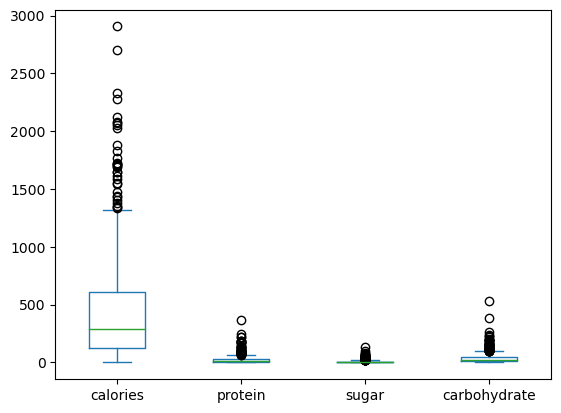

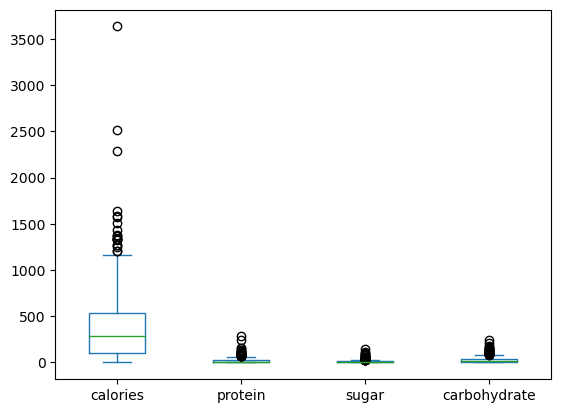

In [23]:
df.groupby('high_traffic')[['calories','protein', 'sugar', 'carbohydrate']].plot(kind='box')

In [24]:
#Removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df.loc[:,'calories':'protein']))

#identify outliers
outliers = np.where(z > 3)

#remove outliers
df = df[(z < 3).all(axis=1)]

In [25]:
df.duplicated()

recipe
1      False
2      False
3      False
4      False
5      False
       ...  
943    False
944     True
945    False
946    False
947    False
Length: 873, dtype: bool

In [26]:
df = df[~df.duplicated()]

### Exploratory Analysis
***In my exploratory data analysis, I conducted several steps to better understand the characteristics of the data. After exploring the distribution of continuous variables, we found that the sugar variable has a bimodal histogram with two peaks around 2 and 10. Pairplot visualization showed weak correlations between all the continuous variables. The boxplot revealed that the dessert category has the highest sugar rate. The pie plot shows that 60.8% of the recipes have high traffic. The barplot demonstrated that recipes with high traffic have more servings compared to those with a moderate traffic, with a difference of 671. Further, the scaling of carbohydrates, sugar, and protein variables showed that, in addition to high calories, recipes with similar carbohydrate, sugar, and protein rates tend to have high traffic. Finally, the pivot table visualization was used to examine the characteristics of the top 3 category recipes with high servings. These top 3 categories had a calories rate between 247-634, protein rate between 7.8-44 grams, carbohydrate rate between 23-58 grams and sugar rate between 8.2-5.1 grams.***

In [27]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [28]:
# Picking a unique color to use in univariate visualization
color = sns.color_palette()[9]

In [29]:
#Scaling the calories varibale for a better understanding
np.log(df['calories']).describe()

count    850.000000
mean       5.418350
std        1.317678
min       -1.966113
25%        4.723862
50%        5.664868
75%        6.338519
max        7.452547
Name: calories, dtype: float64

In [30]:
# Logarithmic Scale Transformation Function
def scaledist(df, col, m, n, p, lim, title, xl, yl):
    bins = 10 ** np.arange(m, n+p, p)
    ticks = [0.01 ,0.5, 1, 5, 10, 50,100,500, 1000, 5000]
    labels = ['{}'.format(v) for v in ticks]
    plt.hist(data=df , x = col, bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlim((0.1,lim))
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show();

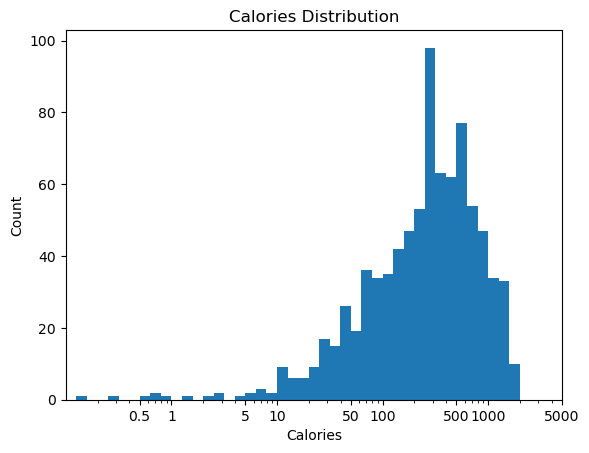

In [31]:
scaledist(df,'calories',-1,8,0.1,5000, 'Calories Distribution', 'Calories', 'Count')

**We notice a right-skewed histogram, Most values fall between 300 and 1000, as we can see the peak is around 500**

In [32]:
np.log(df['sugar']).describe()

count    850.000000
mean       1.301712
std        1.312249
min       -4.605170
25%        0.530628
50%        1.515127
75%        2.169621
max        3.944297
Name: sugar, dtype: float64

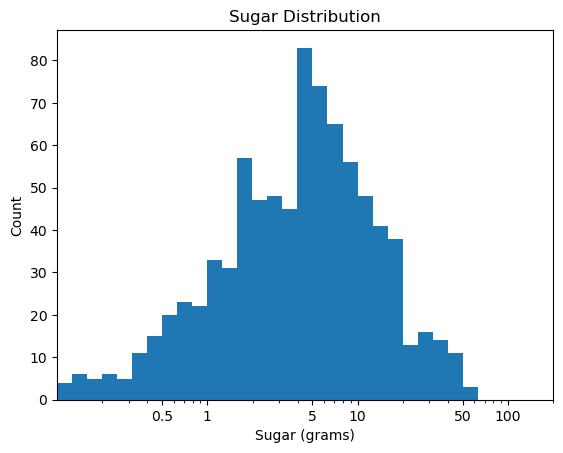

In [33]:
scaledist(df,'sugar',-4.5, 6, 0.1, 200,'Sugar Distribution', 'Sugar (grams)', 'Count')

**We notice a bimodal histogram with two peak respectively around 2 and 8**

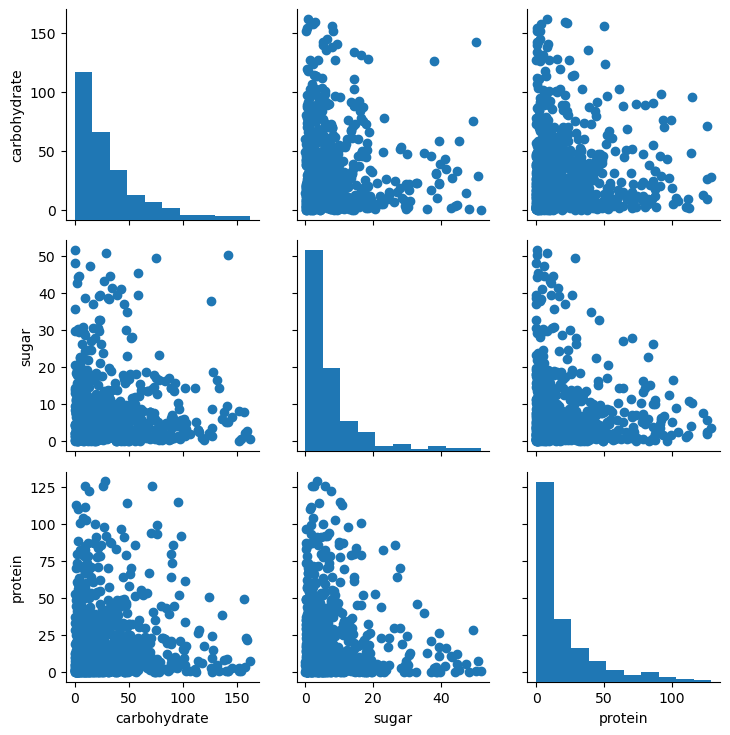

In [34]:
ax = sns.PairGrid(data =df.iloc[:, 1:5])
ax.map_offdiag(plt.scatter)
ax.map_diag(plt.hist);

**All continuous variables have weak correlations with each others**

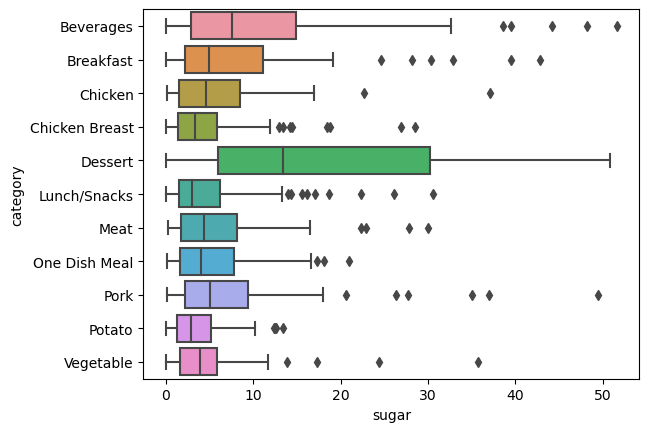

In [35]:
sns.boxplot(data =df, x='sugar', y = 'category');

**The dessert is the highest category in terms of sugar rate**

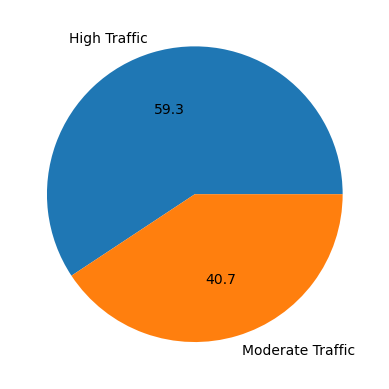

In [36]:
plt.pie(df['high_traffic'].value_counts(), autopct = '%.1f', labels = ['High Traffic', 'Moderate Traffic']);

**Our dataset contains 59.3% of high traffic recipes**

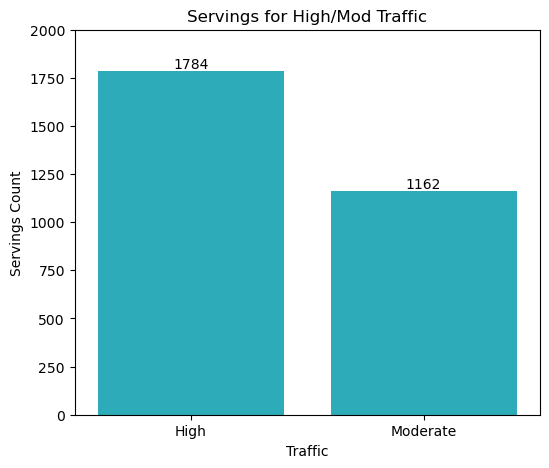

In [37]:
plt.figure(figsize = (6,5))
cal = df.groupby('high_traffic')['servings'].sum()
ax = sns.barplot(x = cal.index , y = cal, color = color)
plt.title("Servings for High/Mod Traffic")
plt.xlabel("Traffic")
plt.ylabel("Servings Count")
plt.ylim((0,2000))

for i in ax.containers:
    ax.bar_label(i,)

**This barplot shows that recipes with high traffic have the most servings count than those with a moderate one**

In [38]:
df[df["high_traffic"] == 'High'][['carbohydrate','sugar','protein']]

,carbohydrate,sugar,protein
recipe,,,
1,21.48,4.55,10.80
2,38.56,0.66,0.92
4,30.56,38.63,0.02
6,3.46,1.65,53.93
9,3.78,3.37,3.79
...,...,...,...
937,1.62,7.57,48.35
938,45.48,6.26,10.44
942,83.94,1.98,22.40


In [39]:
#Scaling 'carbohydrate','sugar','protein' columns for better understanding
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_org = df[df["high_traffic"] == 'High'][['carbohydrate','sugar','protein']].copy()
df_org['carbohydrate'] = scaler.fit_transform(df_org[['carbohydrate']].values)
df_org['sugar'] = scaler.fit_transform(df_org[['sugar']].values)
df_org['protein'] = scaler.fit_transform(df_org[['protein']].values)

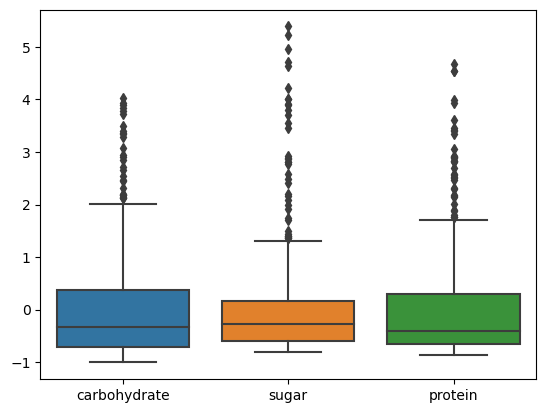

In [40]:
sns.boxplot(data = df_org);

**In addition to high calories, recipes with similar carbohydrate, sugar and protein rate leads to high traffic**

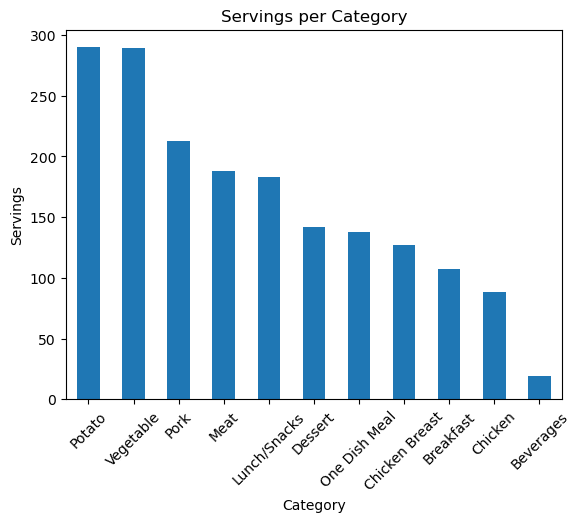

In [41]:
df[df['high_traffic'] == 'High'].groupby('category')['servings'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Servings per Category")
plt.ylabel('Servings')
plt.xlabel('Category')
plt.xticks(rotation=45);

**Potato, Vegetable and Pork are the top 3 categories with high servings count > 200**

In [42]:
def pivot_viz(val,val2,val3,title):
    df.query("high_traffic == 'High' & category.isin(['Potato', 'Vegetable', 'Pork'])").pivot_table(values = [val]
                                               , columns ='category').plot(kind='bar')
    print('Max',df.query("high_traffic == 'High' & category.isin(['Potato', 'Vegetable', 'Pork'])").pivot_table(values = [val]
                                               , columns ='category')[val2].max())
    print('Min',df.query("high_traffic == 'High' & category.isin(['Potato', 'Vegetable', 'Pork'])").pivot_table(values = [val]
                                               , columns ='category')[val3].min())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(title)
    plt.xticks(rotation = 0 );

Max 509.95750000000004
Min 248.93762500000003


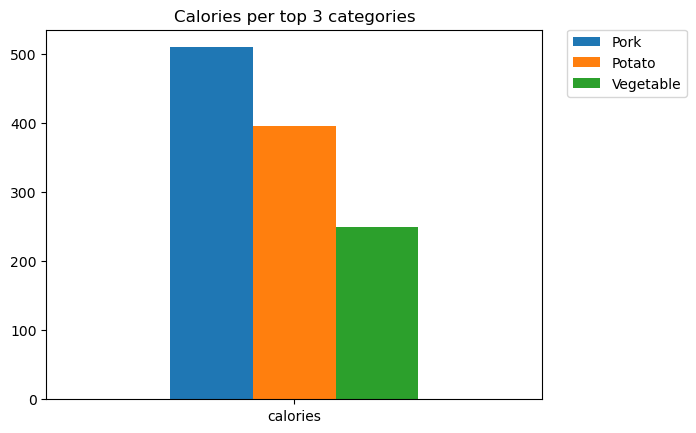

In [43]:
pivot_viz('calories','Pork','Vegetable','Calories per top 3 categories');

**Those top 3 have a calories rate between 249 - 510**

Max 28.492666666666665
Min 7.906375


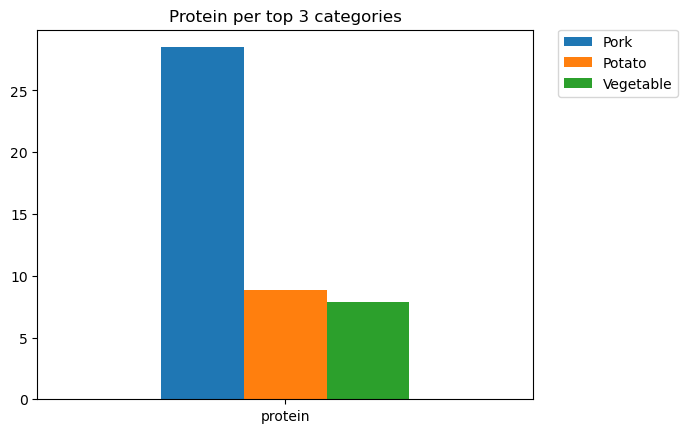

In [44]:
pivot_viz('protein','Pork','Vegetable','Protein per top 3 categories')

**Those top 3 have a protein rate between 8 - 28.5 grams**


Max 39.21067567567568
Min 23.814375000000002


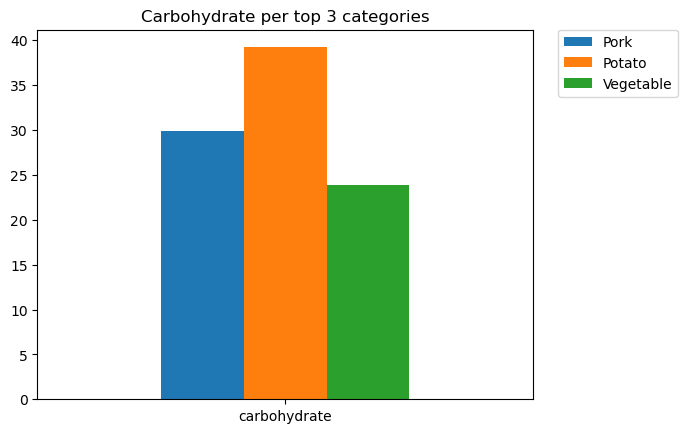

In [45]:
pivot_viz('carbohydrate','Potato','Vegetable','Carbohydrate per top 3 categories')

**Those top 3 have a carbohydrate rate between 24 - 40 grams**

Max 8.315999999999999
Min 3.755540540540541


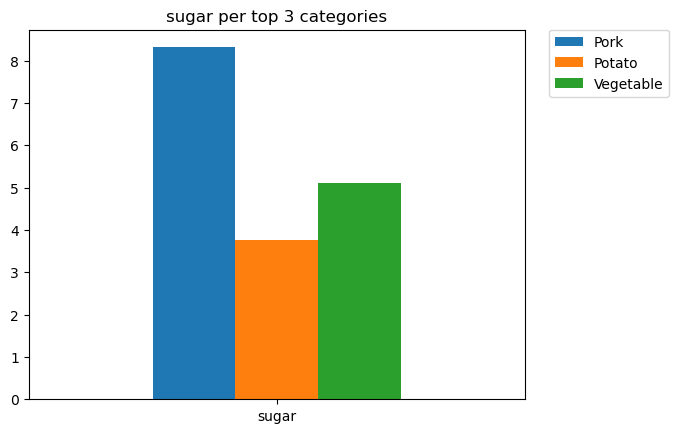

In [46]:
pivot_viz('sugar','Pork','Potato','sugar per top 3 categories')

**Those top 3 have a sugar rate between 3.7 - 8.3 grams**

## Model Development

***In this study, I aimed to predict whether a recipe would have high traffic or not. To accomplish this task, I utilized both logistic regression and decision tree models. Logistic regression is a simple and interpretable model that is often used as a baseline for binary classification tasks, and can handle both linear and non-linear decision boundaries. Decision trees, on the other hand, are simple to understand and interpret, and can handle both categorical and numerical data. Additionally, decision tree's visual representation of the decision making process can be beneficial for interpreting the results of the model. Both models have been widely used in similar problems, hence I have chosen them as our comparison models to evaluate the performance of our problem.***

### Features Encoding

In [47]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,288.55,21.48,4.55,10.80,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Moderate
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Moderate


In [48]:
# Mapping the dependent variable
df['high_traffic'] = df['high_traffic'].map({'High': 1, 'Moderate' : 0})

In [49]:
One_hot = pd.get_dummies(df['category'])
df.drop('category', axis = 1, inplace = True)
df = df.join(One_hot)

In [50]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'high_traffic', 'Beverages', 'Breakfast', 'Chicken', 'Chicken Breast',
       'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
       'Vegetable'],
      dtype='object')

In [51]:
x = df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken', 'Chicken Breast',
       'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
       'Vegetable']]
y = df['high_traffic'].values

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 35)

### Logistic Regression

In [53]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

C:\Users\user\.conda\envs\tea_facts\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = lg.predict(x_test)

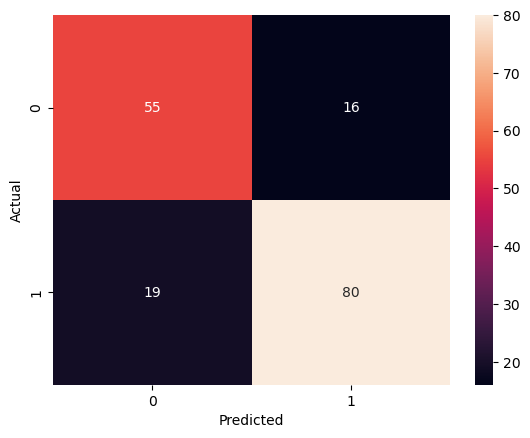

In [55]:
cfs_mx = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames=['Predicted'])
sns.heatmap(cfs_mx, annot=True);

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        71
           1       0.83      0.81      0.82        99

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.79       170
weighted avg       0.80      0.79      0.79       170



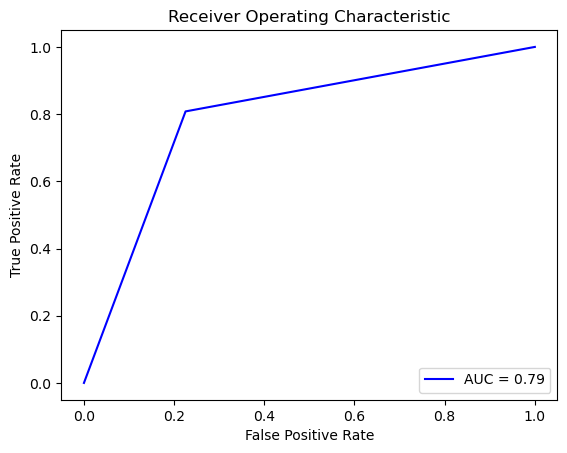

In [57]:
from sklearn.metrics import roc_curve, auc

# Computing FPR, TPR and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Decision Tree


In [59]:
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes = 10, min_samples_leaf = 2, max_depth = 15)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred2))

Accuracy 0.8


In [60]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        71
           1       0.84      0.82      0.83        99

    accuracy                           0.80       170
   macro avg       0.79      0.80      0.80       170
weighted avg       0.80      0.80      0.80       170



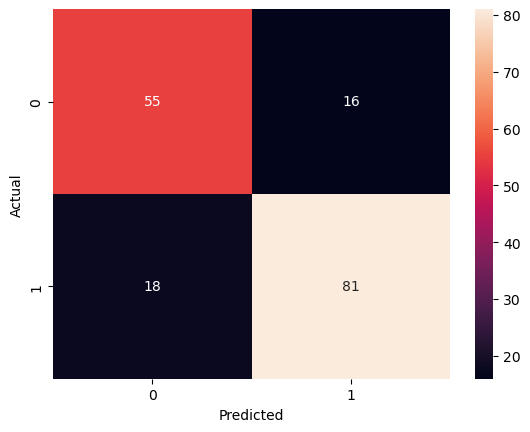

In [61]:
cfs_mx = pd.crosstab(y_test, y_pred2, rownames = ['Actual'], colnames=['Predicted'])
sns.heatmap(cfs_mx, annot=True);

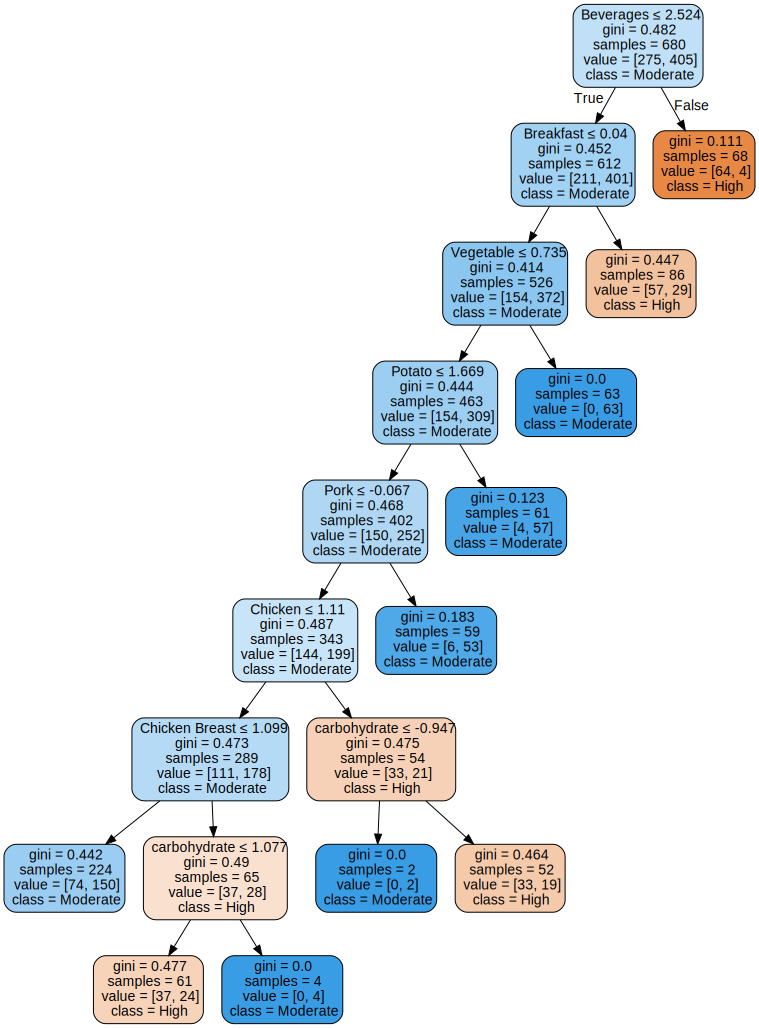

In [62]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken', 'Chicken Breast',
       'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
       'Vegetable'],class_names=['High', 'Moderate'],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

### Model Evaluation
***For my logistic regression model, the True Positive performance metrics are as follows: precision of 0.83  , recall of 0.81, and an f1-score of 0.82. The precision represents the proportion of positive predictions that are actually correct. The recall, on the other hand, represents the proportion of actual positive cases that the model was able to correctly identify.***

***For the decision tree model, the True Positive performance metrics are the same as the Logistic model: precision of 0.83, recall of 0.81, and an f1-score of 0.82.***

***These metrics show that the decision tree model is able to make accurate predictions with a good balance between precision and recall.***

***In conclusion, both models show good performance in terms of True Positive predictions***


### Buisness Metrics
***I chose the confusion matrix as a way to compare my model to the buisness as it supports the above observation, Both models have the same True Positive & False Positive as well as the classification report***

### Buisness Recommendations
**As a final conclusion, it is recommended to highlight potato, pork, and vegetable recipes on the home page as these are not only associated with high servings but also result in high traffic on the website. To attract more visitors, it is advisable to focus on recipes that contain a balance of nutrients, specifically a calorie range of 247-634, protein range of 7.8-44 grams, carbohydrate range of 23-58 grams, and sugar range of 8.2-5.1 grams. These insights will ensure your recipes will be popular among visitors, leading to increased traffic and success for the business.**

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation